In [5]:
# You only need to run this cell once to setup your system

!pip3 install --user pandas
!pip3 install --user psycopg2-binary

### Helper Methods and Imports

In [2]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

%matplotlib inline

# get the database connection (assumes environment variables are set as seen below -- use the force read the source)
env = 'prod'

def get_connection():
    conn = psycopg2.connect(
        host=os.environ["infinite_jupyter_db_host_" + env],
        port=os.environ["infinite_jupyter_db_port_" + env],
        dbname=os.environ["infinite_jupyter_db_name_" + env],
        user=os.environ["infinite_jupyter_db_user_" + env],
        password=os.environ["infinite_jupyter_db_pw_" + env]
    )

    cur = conn.cursor()
    
    return cur

### SQL Queries

In [3]:
sql_get_venues_with_event_counts_for_all_time = """
SELECT num_events, venues.*
FROM venues
JOIN (
    SELECT events.venue_id, COUNT(events.venue_id) as num_events
    FROM events
    GROUP BY (events.venue_id)

) sub ON sub.venue_id = venues.id
ORDER BY num_events DESC;
"""



### Show Venues with the Most Events (Top 10 All Time)

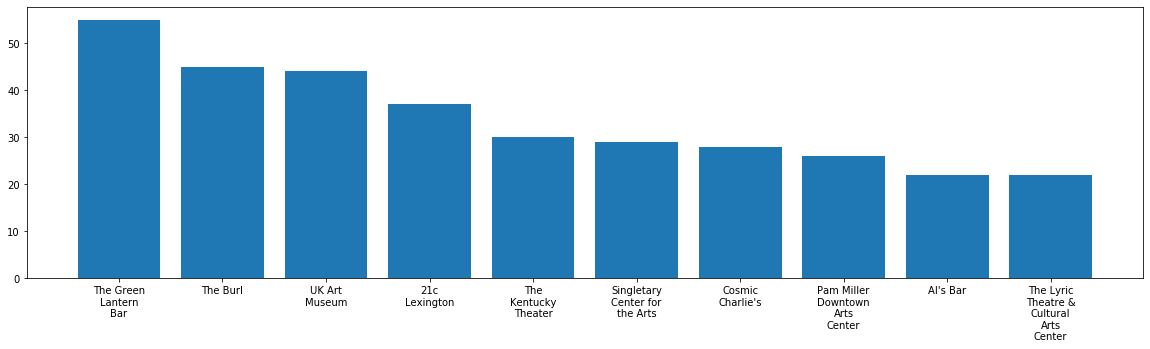

In [5]:
# Get the data
cur = get_connection()

cur.execute(sql_get_venues_with_event_counts_for_all_time)
venues_by_num_events_all_time = cur.fetchall()

cur.close()

# plot the top 10
event_count_col = 0
venue_name_col = 2

top_10_venues = venues_by_num_events_all_time[:10]
top_10_venue_vals = [row[event_count_col] for row in top_10_venues]
top_10_venue_lablels = [row[venue_name_col] for row in top_10_venues]
top_10_venue_lablels = ['\n'.join(wrap(l, 10)) for l in top_10_venue_lablels]

x = np.arange(len(top_10_venues))

#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(x, top_10_venue_vals)
plt.xticks(x, top_10_venue_lablels)
plt.show()